<a href="https://colab.research.google.com/github/Yanle57/NYU_Integrated_Marketing/blob/main/%E2%80%9CFinal_Churn_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install pingouin

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Yanle57/NYU_Integrated_Marketing/main/Final%20Pre.csv')
df=df.dropna()
df.head()

,Year,Expect,College,GDP,Bed
0,1973,62.281,0.20953,1.385440e+11,1.77
1,1974,63.134,0.34419,1.409410e+11,1.85
2,1975,63.915,0.48452,1.469710e+11,1.92
3,1976,64.631,0.57498,1.406870e+11,2.00
4,1977,65.278,0.64845,1.485840e+11,2.07


In [ ]:
df.columns

Index(['Year', 'Expect', 'College', 'GDP', 'Bed'], dtype='object')

# Correlation


In [ ]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [ ]:
pg.pairwise_corr(df,columns=['total_day_calls', 'number_customer_service_calls'], method='pearson').round(3)

ValueError: ignored

In [ ]:
pg.pairwise_corr(df,columns=['total_day_calls', 'number_customer_service_calls','account_length'], method='pearson').round(3)

### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [ ]:
# Partial correlation of total_day_calls and number_customer_service_calls controlling for account_length
x='total_day_calls'
y='number_customer_service_calls'
control='account_length'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
#install the package
import seaborn as sns

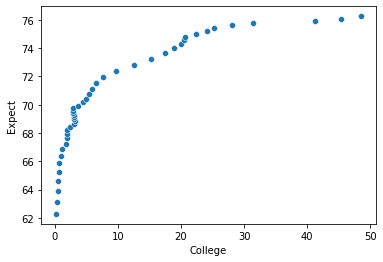

In [ ]:
x='College'
y='Expect'
sns.scatterplot(data=df, x=x, y=y)

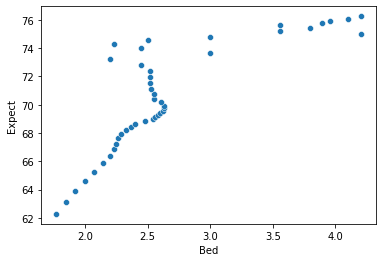

In [ ]:
x='Bed'
y='Expect'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     44 non-null     int64  
 1   Expect   44 non-null     float64
 2   College  44 non-null     float64
 3   GDP      44 non-null     float64
 4   Bed      44 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [ ]:
# define the dependent and independent variables
X=df[['College','GDP','Bed']]
y=df['Expect']


In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,College,GDP,Bed
0,1.0,0.20953,1.385440e+11,1.77
1,1.0,0.34419,1.409410e+11,1.85
2,1.0,0.48452,1.469710e+11,1.92
3,1.0,0.57498,1.406870e+11,2.00
4,1.0,0.64845,1.485840e+11,2.07


In [ ]:
# conduct regression
model = sm.OLS(y, X).fit()

In [ ]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Expect   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     57.64
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.40e-14
Time:                        19:21:29   Log-Likelihood:                -84.373
No. Observations:                  44   AIC:                             176.7
Df Residuals:                      40   BIC:                             183.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.1529      1.979     33.936      0.0

### Check assumptions

In [ ]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,-3.172629,65.453629
1,-2.441739,65.575739
2,-1.613327,65.528327
3,-1.361707,65.992707
4,-0.569157,65.847157


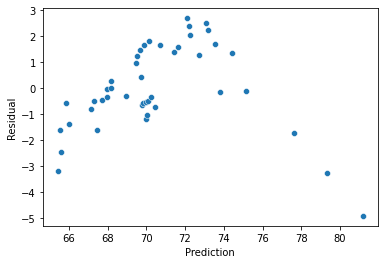

In [ ]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

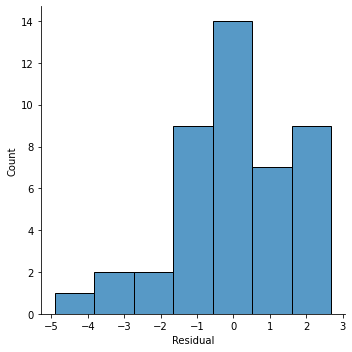

In [ ]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [ ]:
x=df_res['Residual']
pg.normality(x)

,W,pval,normal
Residual,0.953199,0.072414,True


In [ ]:
pg.pairwise_corr(df,columns=['College','GDP','Bed'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,College,GDP,pearson,two-sided,44,0.893,"[0.81, 0.94]",0.797,0.787,1.436,0.0,1.459e+13,1.0
1,College,Bed,pearson,two-sided,44,0.864,"[0.76, 0.92]",0.746,0.734,1.308,0.0,1.648e+11,1.0
2,GDP,Bed,pearson,two-sided,44,0.804,"[0.67, 0.89]",0.647,0.629,1.110,0.0,2.189e+08,1.0


#Logit Analysis

In [ ]:
df['Churn_Numeric'] = df['churn'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

In [ ]:
y=df['Churn_Numeric']
X=df[['total_intl_charge','number_customer_service_calls','account_length']]

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

In [ ]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()